# importing libraries

In [1]:
import tensorflow as tf
import numpy as np
import cv2
import os
import pandas as pd
import matplotlib.pyplot as plt
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam , RMSprop , Adagrad , Adamax , SGD
from tensorflow.keras.models import Sequential , Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D ,Input, Lambda, ZeroPadding2D
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator , load_img
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from glob import glob
from tensorflow.keras.regularizers import l2 , l1
from sklearn.metrics import confusion_matrix , classification_report
import seaborn as sns
import matplotlib.image as img
from IPython.display import Image as IPyImage
from PIL import Image
from sklearn.metrics import (accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, 
recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve,
plot_precision_recall_curve, average_precision_score)
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from keras.utils import np_utils 
from sklearn.model_selection import train_test_split
from numpy import interp
from tensorflow.keras.layers import InputLayer , TimeDistributed, LSTM
from tensorflow.keras import layers

# Loading dataset

## Defining a fuction for loading images ... 

In [2]:
IMM_SIZE = 110

In [3]:
def load_data(folder):
    class_names = [f for f in os.listdir(folder) if not f.startswith('.')] # ctreate a list of SubFolders

    data = []
    print(class_names)
    for t, f in enumerate(class_names):
        images = glob(folder + "/" + f + "/*")
        print("loading: ", f)
        fig = plt.figure(figsize = (50,50)) 
        for im_n, im in enumerate(images):
            plt.gray() 
            image = cv2.imread(im)
            if len(image.shape) > 2:
                image = cv2.resize(image, (IMM_SIZE, IMM_SIZE), interpolation = cv2.INTER_LINEAR) 
            else:
                image = cv2.resize(image, (IMM_SIZE, IMM_SIZE))
            if len(image.shape) > 2:
                image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                image.flatten()
                                           
            data.append([image, f])
        

    return np.array(data) 

In [4]:
data_path='C:/Users/Iman/Desktop/DL project/dataset/data'

In [5]:
data = load_data(data_path)

['adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib', 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa', 'normal', 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa']
loading:  adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib
loading:  large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa
loading:  normal
loading:  squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa


C:\Users\Iman\Anaconda3\envs\tf2.8\lib\site-packages\ipykernel_launcher.py:24: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


<Figure size 5000x5000 with 0 Axes>

<Figure size 5000x5000 with 0 Axes>

<Figure size 5000x5000 with 0 Axes>

<Figure size 5000x5000 with 0 Axes>

C:\Users\Iman\Anaconda3\envs\tf2.8\lib\site-packages\ipykernel_launcher.py:33: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


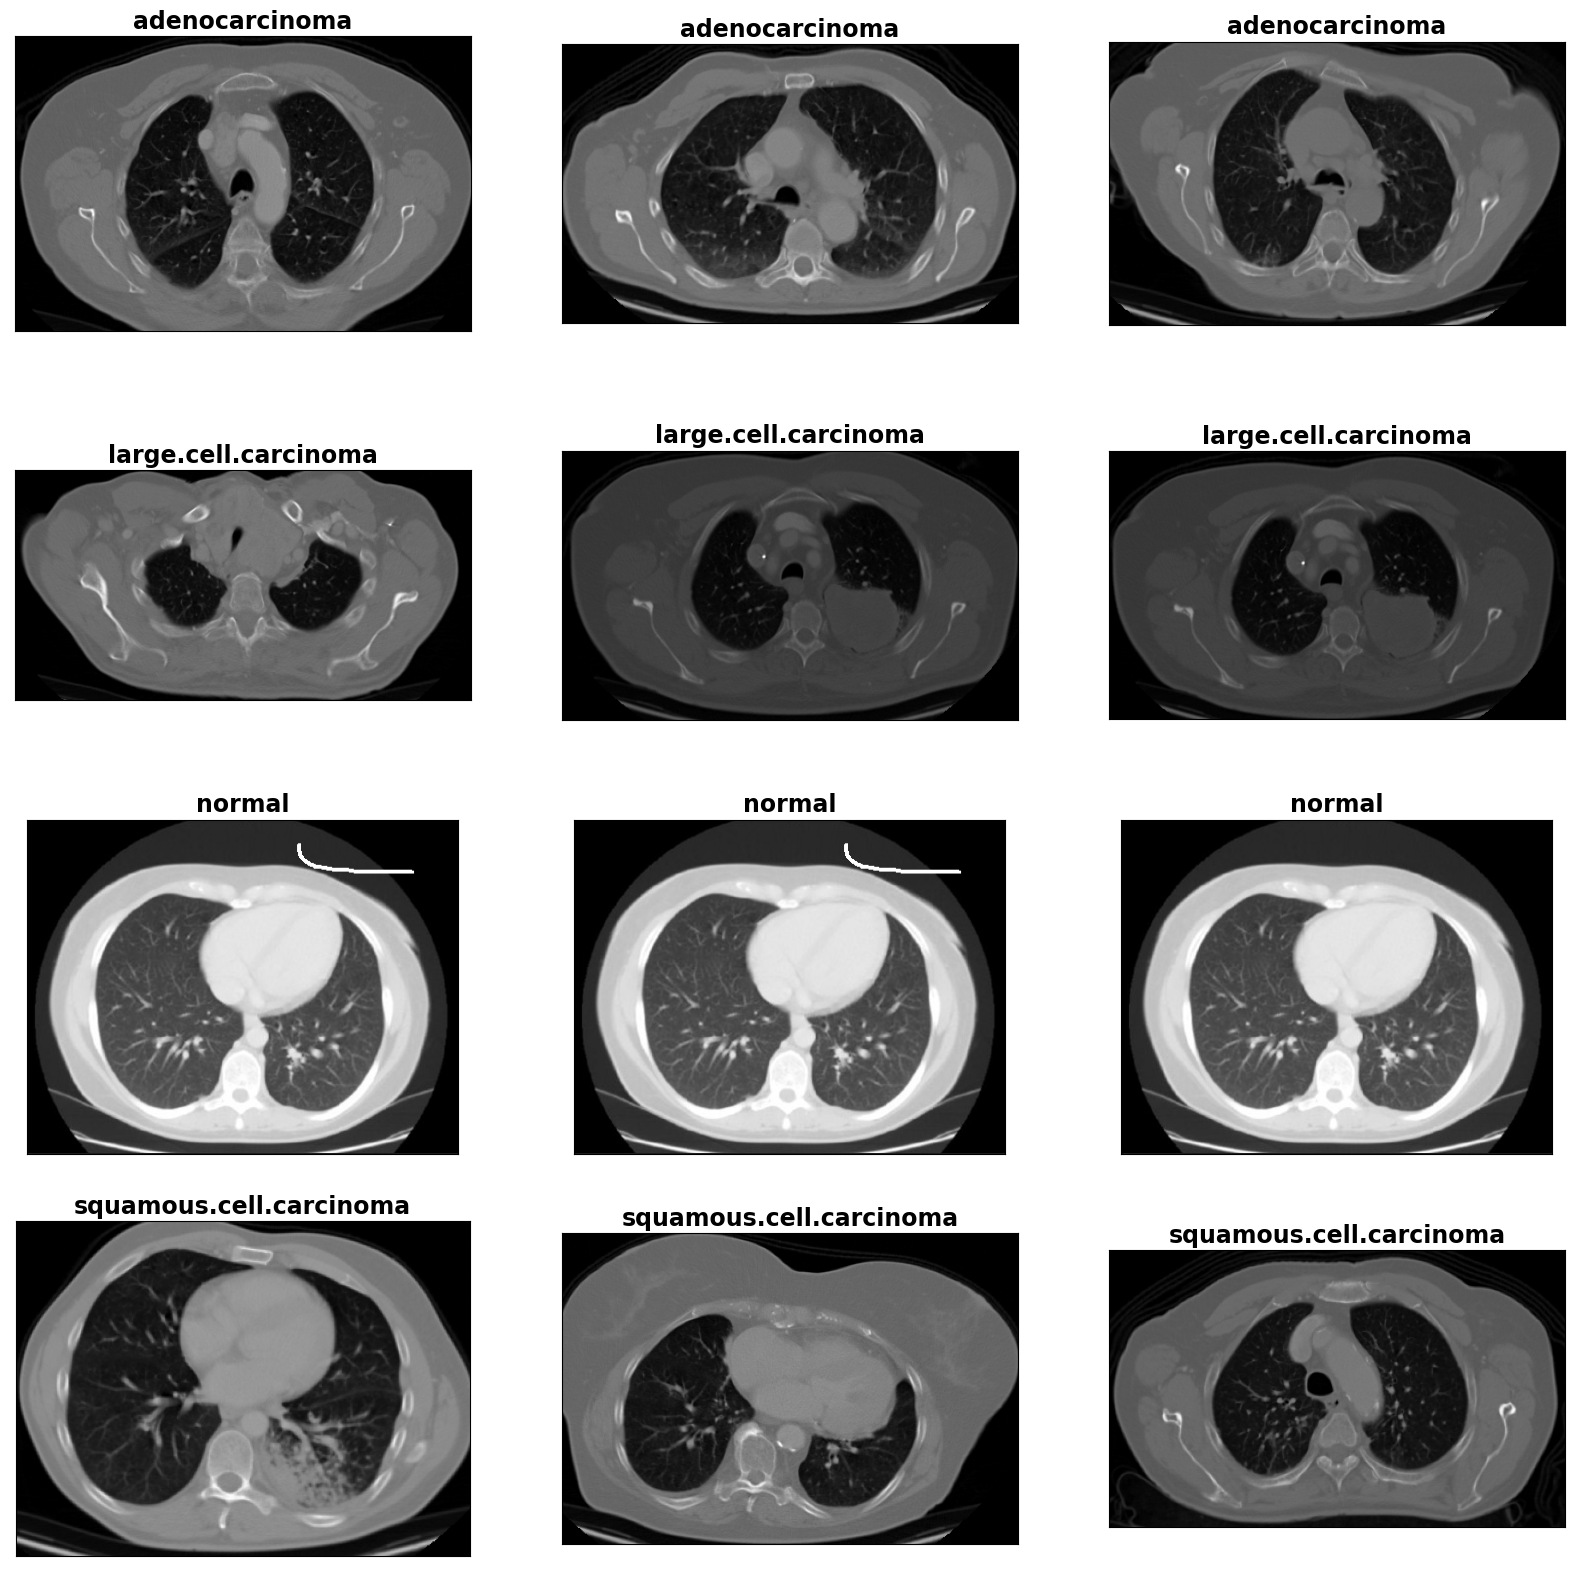

In [7]:
fig, ax = plt.subplots(4,3,figsize=(4*5,4*5))

for i in range(3):
    path=f"C:/Users/Iman/Desktop/DL project/show/new/0{i+1}.png"
    image=img.imread(path)
    ax[0][i].imshow(image)
    ax[0][i].axes.xaxis.set_visible(False)
    ax[0][i].axes.yaxis.set_visible(False)
    ax[0][i].set_title('adenocarcinoma',fontweight="bold",size=17)
for i in range(3):
    path=f"C:/Users/Iman/Desktop/DL project/show/New folder (2)/0{i+1}.png"
    image=img.imread(path)
    ax[1][i].imshow(image)
    ax[1][i].axes.xaxis.set_visible(False)
    ax[1][i].axes.yaxis.set_visible(False)
    ax[1][i].set_title('large.cell.carcinoma',fontweight="bold",size=17)
    
for i in range(3):
    path=f"C:/Users/Iman/Desktop/DL project/show/New folder (3)/0{i+1}.png"
    image=img.imread(path)
    ax[2][i].imshow(image)
    ax[2][i].axes.xaxis.set_visible(False)
    ax[2][i].axes.yaxis.set_visible(False)
    ax[2][i].set_title('normal',fontweight="bold",size=17)

for i in range(3):
    path=f"C:/Users/Iman/Desktop/DL project/show/New folder (4)/0{i+1}.png"
    image=img.imread(path)
    ax[3][i].imshow(image)
    ax[3][i].axes.xaxis.set_visible(False)
    ax[3][i].axes.yaxis.set_visible(False)
    ax[3][i].set_title('squamous.cell.carcinoma',fontweight="bold",size=17)    
fig.show()

# Preprocessing

## Segregation between images and labels 

In [6]:
images = []
labels = []


for feature, label in data:
    images.append(feature)
    labels.append(label)

#min_max normalization
images = np.array(images) / 255.0

# Resizing input images
images = images.reshape(-1, IMM_SIZE, IMM_SIZE, 1)

# Creating a dictionary of clases
lab = {}
for i, l in enumerate(set(labels)):
    lab[l] = i


labels = np.array([lab[l] for l in labels])

In [7]:
print("Shape of the input DataSet:", images.shape)
print("Shape of the output DataSet:", labels.shape)
print("Dictionary of classes:", lab)

Shape of the input DataSet: (900, 110, 110, 1)
Shape of the output DataSet: (900,)
Dictionary of classes: {'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa': 0, 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa': 1, 'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib': 2, 'normal': 3}


## Encoding labels

In [8]:
encoder = LabelEncoder()
encoder.fit(labels)
encoded_Y = encoder.transform(labels)
dummy_Y = np_utils.to_categorical(encoded_Y)
dummy_Y.astype(int)

array([[0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       ...,
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0]])

## Train_Test_Validation Split 

In [9]:
train_dataset, test_dataset, train_label, test_label = train_test_split(images, dummy_Y, test_size = .3)

In [10]:
test_dataset, validation_dataset, test_label, validation_label = train_test_split(test_dataset, test_label, test_size = .3)

In [11]:
print('train_d :' , train_dataset.shape)
print('test_shape :' , test_dataset.shape)
print('validation_shape :' , validation_dataset.shape)

train_d : (630, 110, 110, 1)
test_shape : (189, 110, 110, 1)
validation_shape : (81, 110, 110, 1)


# Building LSTM Model

## LSTM model 1

In [49]:
from keras import layers
import tensorflow
inputs = tensorflow.keras.layers.Input(shape=(110,110,1))
x = tf.keras.layers.Conv2D(32,(3,3) ,activation='relu',padding='same', input_shape=(224, 224, 1))(inputs)
x = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(x)
    


x = tf.keras.layers.Conv2D(128,(3,3) ,padding='same', activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(x)
x = tf.keras.layers.Dropout(0.5)(x)



x = layers.Reshape((27*27, 128))(x)

x = layers.LSTM(64, activation='tanh', return_sequences=True)(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = layers.LSTM(32, activation='tanh')(x)

out = tf.keras.layers.Dense(4, activation='softmax')(x)

model = tensorflow.keras.Model(inputs = inputs , outputs = out)

In [50]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [51]:
def scheduler(epoch, lr):
  if epoch < 10:
    return lr
  else:
    return lr * tf.math.exp(-0.1)

In [52]:
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [55]:
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 110, 110, 1)]     0         
                                                                 
 conv2d_20 (Conv2D)          (None, 110, 110, 32)      320       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 55, 55, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 55, 55, 128)       36992     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 27, 27, 128)      0         
 g2D)                                                            
                                                                 
 dropout_22 (Dropout)        (None, 27, 27, 128)       0   

In [54]:
history = model.fit(train_dataset, train_label,
                         epochs=50,
                         batch_size=16,
                         validation_data = (validation_dataset , validation_label), callbacks=[callback])

Epoch 1/50
40/40 [==============================] - 11s 202ms/step - loss: 1.3207 - accuracy: 0.3857 - val_loss: 1.2185 - val_accuracy: 0.3457 - lr: 0.0010
Epoch 2/50
40/40 [==============================] - 7s 179ms/step - loss: 1.1609 - accuracy: 0.4333 - val_loss: 1.0414 - val_accuracy: 0.4321 - lr: 0.0010
Epoch 3/50
40/40 [==============================] - 7s 182ms/step - loss: 1.1629 - accuracy: 0.4444 - val_loss: 1.0967 - val_accuracy: 0.4198 - lr: 0.0010
Epoch 4/50
40/40 [==============================] - 7s 186ms/step - loss: 1.0465 - accuracy: 0.4937 - val_loss: 1.3479 - val_accuracy: 0.3210 - lr: 0.0010
Epoch 5/50
40/40 [==============================] - 8s 189ms/step - loss: 1.0532 - accuracy: 0.4667 - val_loss: 1.0193 - val_accuracy: 0.4444 - lr: 0.0010
Epoch 6/50
40/40 [==============================] - 8s 207ms/step - loss: 0.9861 - accuracy: 0.5127 - val_loss: 0.9822 - val_accuracy: 0.4444 - lr: 0.0010
Epoch 7/50
40/40 [==============================] - 9s 234ms/step - l

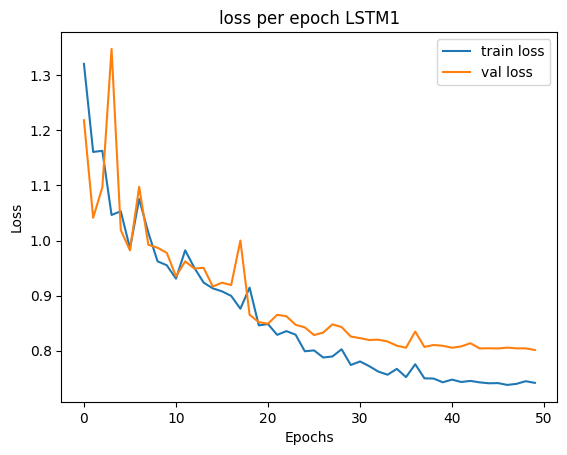

In [63]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('loss per epoch LSTM1')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# plt.savefig('loss per epoch LSTM2' , dpi=100)
plt.show()

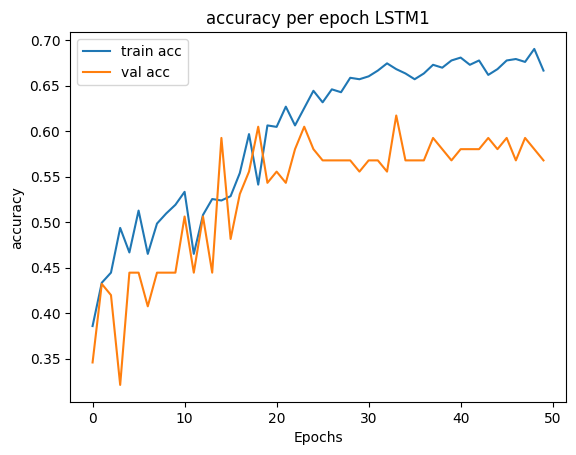

In [64]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.title('accuracy per epoch LSTM1')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
#plt.savefig('accuracy per epoch LSTM2' , dpi=100)
plt.show()

In [58]:
class_labels = ['adenocarcinoma','large.cell.carcinoma' ,'normal', 'squamous.cell.carcinoma']

In [59]:
ypred1 = model.predict(test_dataset , batch_size=16)
ypred_classes1 = np.argmax(ypred1, axis=1)
pred_label1 = np.argmax(model.predict(test_dataset, batch_size=32),axis=1)
true_label = np.argmax(test_label,axis=1)

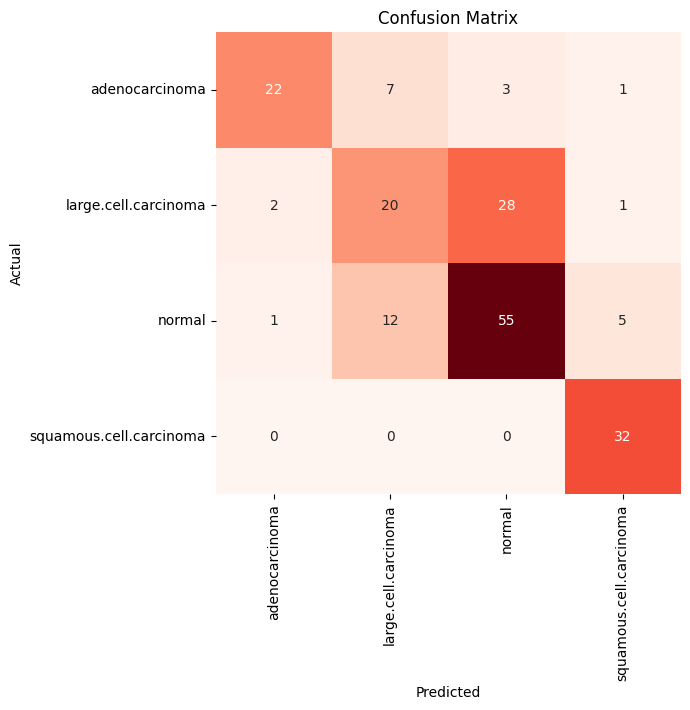

Classification Report:
----------------------
                          precision    recall  f1-score   support

         adenocarcinoma     0.8800    0.6667    0.7586        33
   large.cell.carcinoma     0.5128    0.3922    0.4444        51
                 normal     0.6395    0.7534    0.6918        73
squamous.cell.carcinoma     0.8205    1.0000    0.9014        32

               accuracy                         0.6825       189
              macro avg     0.7132    0.7031    0.6991       189
           weighted avg     0.6780    0.6825    0.6722       189



In [60]:
cm = confusion_matrix(true_label, pred_label1)
# plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap= 'Reds', cbar=False)       
plt.xticks(np.arange(4)+.5, class_labels, rotation=90)
plt.yticks(np.arange(4)+.5, class_labels, rotation=0)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
clr = classification_report(true_label, pred_label1, target_names=class_labels, digits= 4) # create classification report
print("Classification Report:\n----------------------\n", clr)

In [61]:
n_classes = 4 

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(test_label[:, i], ypred1[:, i], )
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["adenocarcinoma"], tpr["adenocarcinoma"], _ = roc_curve(test_label.ravel(), ypred1.ravel())
roc_auc["adenocarcinoma"] = auc(fpr["adenocarcinoma"], tpr["adenocarcinoma"])

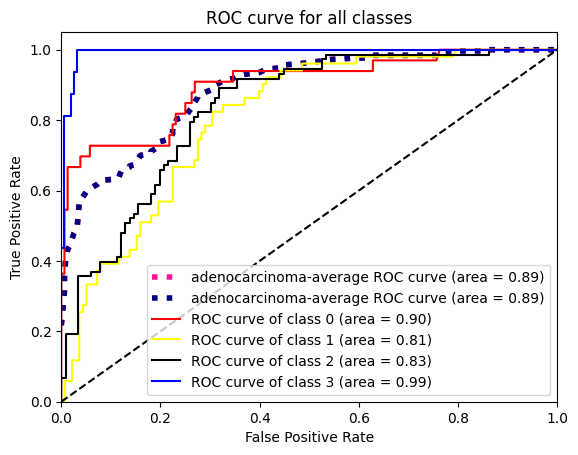

In [62]:
from itertools import cycle
lw = 1.5
roc_auc_scores = []
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["adenocarcinoma"] = all_fpr
tpr["adenocarcinoma"] = mean_tpr
roc_auc["adenocarcinoma"] = auc(fpr["adenocarcinoma"], tpr["adenocarcinoma"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["adenocarcinoma"], tpr["adenocarcinoma"],
         label='adenocarcinoma-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["adenocarcinoma"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["adenocarcinoma"], tpr["adenocarcinoma"],
         label='adenocarcinoma-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["adenocarcinoma"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['red', 'yellow', 'black' , 'blue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
    roc_auc_scores.append(roc_auc[i])
    

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for all classes')
plt.legend(loc='lower right')
plt.show()

## LSTM model 2


In [34]:
from keras import layers
import tensorflow
inputs = tensorflow.keras.layers.Input(shape=(224,224,1))
x = tf.keras.layers.Conv2D(32,(3,3) ,activation='relu',padding='same', input_shape=(224, 224, 1))(inputs)
x = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(x)
    
    
x = tf.keras.layers.Conv2D(64,(3,3),padding='same',activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(x)
x = tf.keras.layers.Dropout(0.2)(x)


x = tf.keras.layers.Conv2D(128,(3,3) ,padding='same', activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(x)
x = tf.keras.layers.Dropout(0.2)(x)

x = tf.keras.layers.Conv2D(256,(3,3) ,padding='same', activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(x)
x = tf.keras.layers.Dropout(0.2)(x)

x = layers.Reshape((14*14, 256))(x)

x = layers.LSTM(32, activation='tanh', return_sequences=True)(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = layers.LSTM(4, activation='tanh')(x)

out = tf.keras.layers.Dense(4, activation='softmax')(x)
model_2 = tensorflow.keras.Model(inputs = inputs , outputs = out)

In [35]:
model_2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [36]:
model_2.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 1)]     0         
                                                                 
 conv2d_14 (Conv2D)          (None, 224, 224, 32)      320       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 112, 112, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 56, 56, 64)       0         
 g2D)                                                            
                                                                 
 dropout_18 (Dropout)        (None, 56, 56, 64)        0   

In [37]:
history_2 = model_2.fit(train_dataset, train_label,
                         epochs=50,
                         batch_size=8,
                         validation_data = (validation_dataset , validation_label), callbacks=[callback])

Epoch 1/50
79/79 [==============================] - 24s 259ms/step - loss: 1.3370 - accuracy: 0.3508 - val_loss: 1.2715 - val_accuracy: 0.3704 - lr: 0.0010
Epoch 2/50
79/79 [==============================] - 28s 357ms/step - loss: 1.2551 - accuracy: 0.4190 - val_loss: 1.2476 - val_accuracy: 0.4321 - lr: 0.0010
Epoch 3/50
79/79 [==============================] - 30s 376ms/step - loss: 1.1918 - accuracy: 0.4651 - val_loss: 1.1057 - val_accuracy: 0.5432 - lr: 0.0010
Epoch 4/50
79/79 [==============================] - 29s 372ms/step - loss: 1.1518 - accuracy: 0.4349 - val_loss: 1.1991 - val_accuracy: 0.4074 - lr: 0.0010
Epoch 5/50
79/79 [==============================] - 30s 383ms/step - loss: 1.0722 - accuracy: 0.4825 - val_loss: 1.0114 - val_accuracy: 0.5926 - lr: 0.0010
Epoch 6/50
79/79 [==============================] - 31s 394ms/step - loss: 1.0238 - accuracy: 0.5175 - val_loss: 1.0419 - val_accuracy: 0.5432 - lr: 0.0010
Epoch 7/50
79/79 [==============================] - 31s 397ms/st

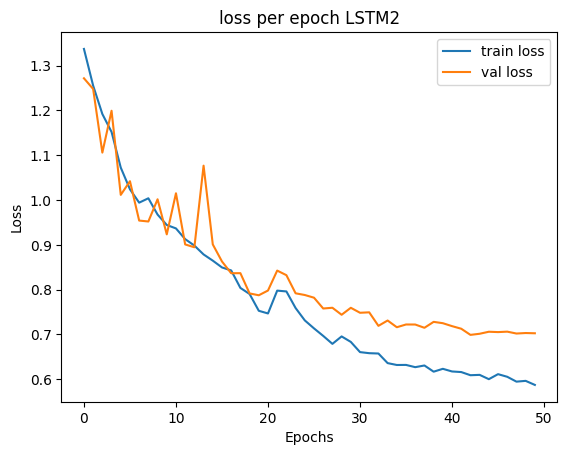

In [39]:
# plt.plot(history_2.history['loss'], label='train loss')
# plt.plot(history_2.history['val_loss'], label='val loss')
# plt.ylim(0, 1)
# plt.title('loss per epoch LSTM2')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.savefig('loss per epoch LSTM2' , dpi=100)
# plt.show()

plt.plot(history_2.history['loss'], label='train loss')
plt.plot(history_2.history['val_loss'], label='val loss')
plt.title('loss per epoch LSTM2')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# plt.savefig('loss per epoch LSTM2' , dpi=100)
plt.show()

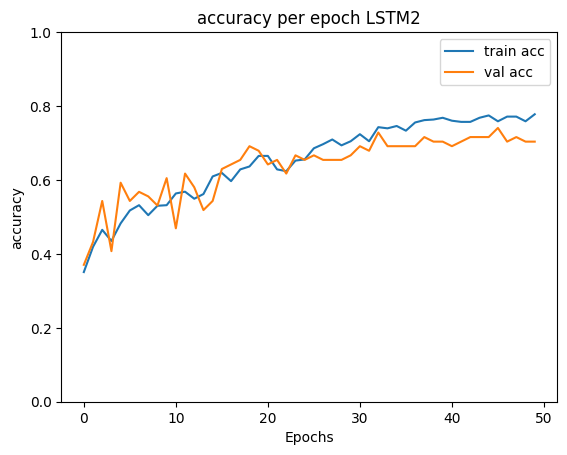

In [41]:
plt.plot(history_2.history['accuracy'], label='train acc')
plt.plot(history_2.history['val_accuracy'], label='val acc')
plt.ylim(0, 1)
plt.title('accuracy per epoch LSTM2')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
#plt.savefig('accuracy per epoch LSTM2' , dpi=100)
plt.show()

# plt.plot(history_2.history['accuracy'], label='train acc')
# plt.plot(history_2.history['val_accuracy'], label='val acc')
# plt.title('accuracy per epoch LSTM2')
# plt.xlabel('Epochs')
# plt.ylabel('accuracy')
# plt.legend()
# #plt.savefig('accuracy per epoch LSTM2' , dpi=100)
# plt.show()

In [42]:
class_labels = ['adenocarcinoma','large.cell.carcinoma' ,'normal', 'squamous.cell.carcinoma']

In [44]:
ypred2 = model_2.predict(test_dataset , batch_size=16)
ypred_classes2 = np.argmax(ypred2, axis=1)
pred_label2 = np.argmax(model_2.predict(test_dataset, batch_size=32),axis=1)
true_label = np.argmax(test_label,axis=1)

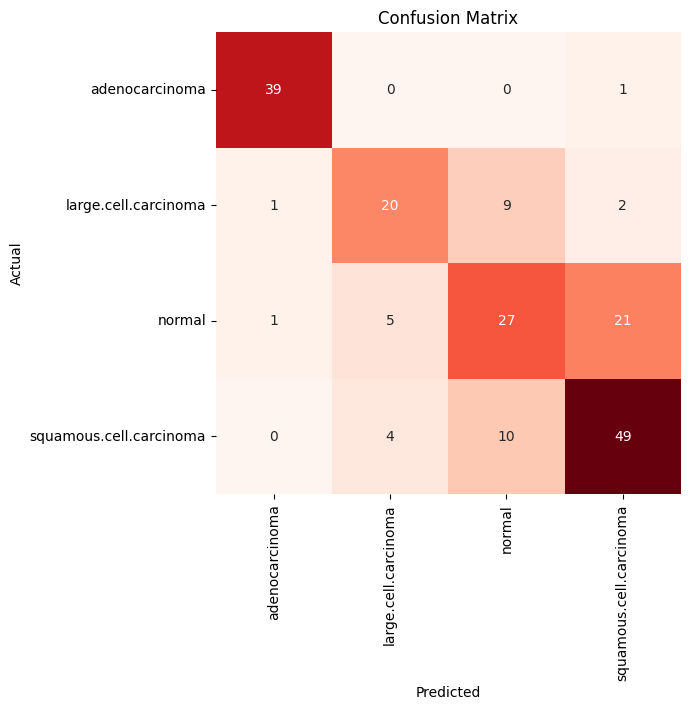

Classification Report:
----------------------
                          precision    recall  f1-score   support

         adenocarcinoma     0.9512    0.9750    0.9630        40
   large.cell.carcinoma     0.6897    0.6250    0.6557        32
                 normal     0.5870    0.5000    0.5400        54
squamous.cell.carcinoma     0.6712    0.7778    0.7206        63

               accuracy                         0.7143       189
              macro avg     0.7248    0.7194    0.7198       189
           weighted avg     0.7095    0.7143    0.7093       189



In [45]:
cm = confusion_matrix(true_label, pred_label2)
# plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap= 'Reds', cbar=False)       
plt.xticks(np.arange(4)+.5, class_labels, rotation=90)
plt.yticks(np.arange(4)+.5, class_labels, rotation=0)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
clr = classification_report(true_label, pred_label2, target_names=class_labels, digits= 4) # create classification report
print("Classification Report:\n----------------------\n", clr)

In [48]:
n_classes = 4 

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(test_label[:, i], ypred2[:, i], )
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["adenocarcinoma"], tpr["adenocarcinoma"], _ = roc_curve(test_label.ravel(), ypred2.ravel())
roc_auc["adenocarcinoma"] = auc(fpr["adenocarcinoma"], tpr["adenocarcinoma"])

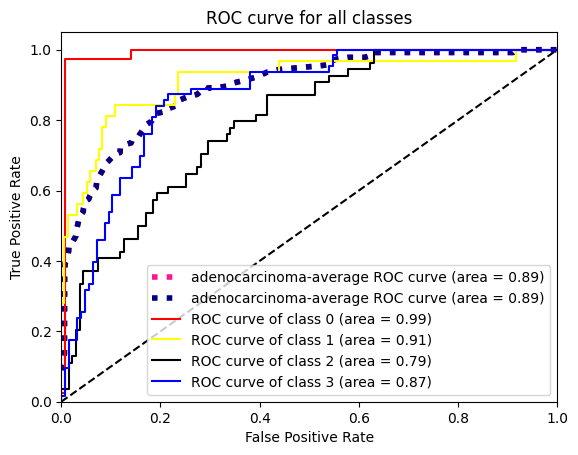

In [49]:
from itertools import cycle
lw = 1.5
roc_auc_scores = []
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["adenocarcinoma"] = all_fpr
tpr["adenocarcinoma"] = mean_tpr
roc_auc["adenocarcinoma"] = auc(fpr["adenocarcinoma"], tpr["adenocarcinoma"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["adenocarcinoma"], tpr["adenocarcinoma"],
         label='adenocarcinoma-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["adenocarcinoma"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["adenocarcinoma"], tpr["adenocarcinoma"],
         label='adenocarcinoma-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["adenocarcinoma"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['red', 'yellow', 'black' , 'blue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
    roc_auc_scores.append(roc_auc[i])
    

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for all classes')
plt.legend(loc='lower right')
plt.show()

## LSTM model 3

In [23]:
from keras import layers
import tensorflow
inputs = tensorflow.keras.layers.Input(shape=(224,224,1))
x = tf.keras.layers.Conv2D(32,(3,3) ,activation='relu',padding='same', input_shape=(224, 224, 1))(inputs)
x = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.2)(x)
    
    
x = tf.keras.layers.Conv2D(64,(3,3),padding='same',activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.BatchNormalization()(x)

x = tf.keras.layers.Conv2D(128,(3,3) ,padding='same', activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(x)
x = tf.keras.layers.Dropout(0.2)(x)

x = tf.keras.layers.Conv2D(256,(3,3) ,padding='same', activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(x)
x = tf.keras.layers.Dropout(0.2)(x)

x = tf.keras.layers.Conv2D(512,(3,3) ,padding='same', activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(x)
x = tf.keras.layers.Dropout(0.2)(x)

x = layers.Reshape((7*7, 512))(x)
x = layers.LSTM(100, activation='tanh', return_sequences=True)(x)
x = layers.LSTM(16, activation='tanh')(x)

out = tf.keras.layers.Dense(4, activation='softmax')(x)
model_3 = tensorflow.keras.Model(inputs = inputs , outputs = out)

In [17]:
def scheduler(epoch, lr):
  if epoch < 10:
    return lr
  else:
    return lr * tf.math.exp(-0.1)

In [18]:
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [29]:
model_3.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [27]:
model_3.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 1)]     0         
                                                                 
 conv2d_9 (Conv2D)           (None, 224, 224, 32)      320       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 batch_normalization_2 (Batc  (None, 112, 112, 32)     128       
 hNormalization)                                                 
                                                                 
 dropout_8 (Dropout)         (None, 112, 112, 32)      0         
                                                                 
 conv2d_10 (Conv2D)          (None, 112, 112, 64)      1849

In [30]:
history_3 = model_3.fit(train_dataset, train_label,
                         epochs=50,
                         batch_size=16,
                         validation_data = (validation_dataset , validation_label), callbacks=[callback])

Epoch 1/50
40/40 [==============================] - 32s 676ms/step - loss: 1.2428 - accuracy: 0.4381 - val_loss: 1.2840 - val_accuracy: 0.3086 - lr: 0.0010
Epoch 2/50
40/40 [==============================] - 30s 770ms/step - loss: 1.0175 - accuracy: 0.5286 - val_loss: 1.6031 - val_accuracy: 0.2593 - lr: 0.0010
Epoch 3/50
40/40 [==============================] - 31s 776ms/step - loss: 1.0345 - accuracy: 0.5175 - val_loss: 1.4357 - val_accuracy: 0.2963 - lr: 0.0010
Epoch 4/50
40/40 [==============================] - 33s 806ms/step - loss: 1.0004 - accuracy: 0.5270 - val_loss: 1.2211 - val_accuracy: 0.3210 - lr: 0.0010
Epoch 5/50
40/40 [==============================] - 33s 825ms/step - loss: 1.0175 - accuracy: 0.5190 - val_loss: 1.0279 - val_accuracy: 0.3951 - lr: 0.0010
Epoch 6/50
40/40 [==============================] - 34s 826ms/step - loss: 0.9914 - accuracy: 0.5222 - val_loss: 1.0382 - val_accuracy: 0.3951 - lr: 0.0010
Epoch 7/50
40/40 [==============================] - 33s 818ms/st

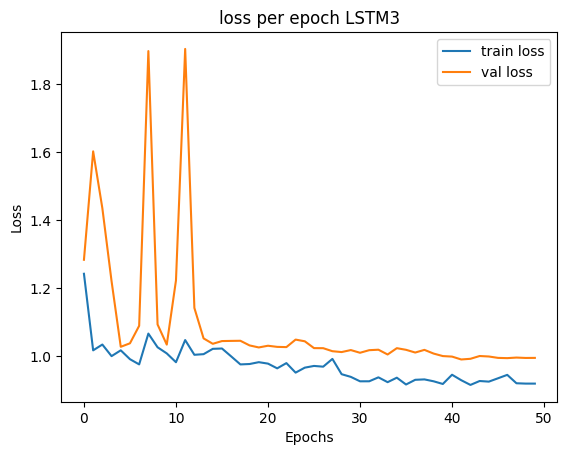

In [31]:
# plt.plot(history_3.history['loss'], label='train loss')
# plt.plot(history_3.history['val_loss'], label='val loss')
# plt.ylim(0, 2)
# plt.title('loss per epoch LSTM3')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# # plt.savefig('loss per epoch LSTM3' , dpi=100)
# plt.show()

plt.plot(history_3.history['loss'], label='train loss')
plt.plot(history_3.history['val_loss'], label='val loss')
plt.title('loss per epoch LSTM3')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# plt.savefig('loss per epoch LSTM3' , dpi=100)
plt.show()

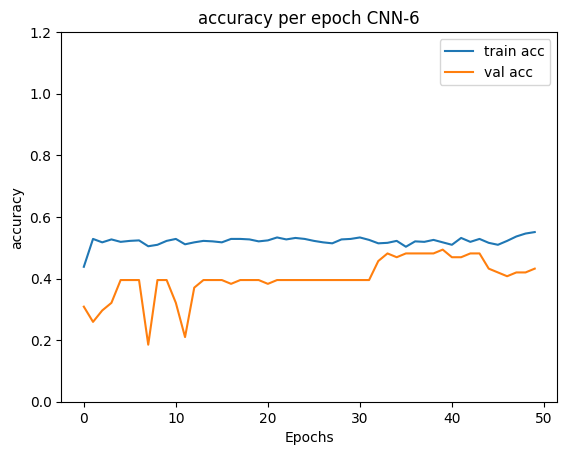

In [33]:
plt.plot(history_3.history['accuracy'], label='train acc')
plt.plot(history_3.history['val_accuracy'], label='val acc')
plt.ylim(0, 1.2)
plt.title('accuracy per epoch CNN-6')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
#plt.savefig('accuracy per epoch CNN-6' , dpi=100)
plt.show()

# plt.plot(history_3.history['accuracy'], label='train acc')
# plt.plot(history_3.history['val_accuracy'], label='val acc')
# plt.title('accuracy per epoch LSTM3')
# plt.xlabel('Epochs')
# plt.ylabel('accuracy')
# plt.legend()
# #plt.savefig('accuracy per epoch CNN-6' , dpi=100)
# plt.show()

In [34]:
class_labels = ['adenocarcinoma','large.cell.carcinoma' ,'normal', 'squamous.cell.carcinoma']

In [35]:
ypred3 = model_3.predict(test_dataset , batch_size=16)
ypred_classes3 = np.argmax(ypred3, axis=1)
pred_label3 = np.argmax(model_3.predict(test_dataset, batch_size=8),axis=1)
true_label = np.argmax(test_label,axis=1)

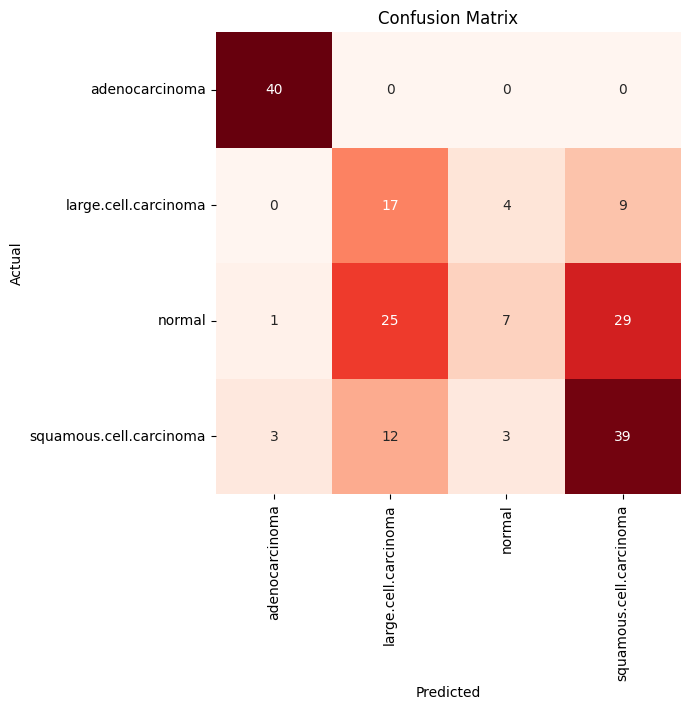

Classification Report:
----------------------
                          precision    recall  f1-score   support

         adenocarcinoma     0.9091    1.0000    0.9524        40
   large.cell.carcinoma     0.3148    0.5667    0.4048        30
                 normal     0.5000    0.1129    0.1842        62
squamous.cell.carcinoma     0.5065    0.6842    0.5821        57

               accuracy                         0.5450       189
              macro avg     0.5576    0.5909    0.5309       189
           weighted avg     0.5591    0.5450    0.5018       189



In [36]:
cm = confusion_matrix(true_label, pred_label3)
# plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap= 'Reds', cbar=False)       
plt.xticks(np.arange(4)+.5, class_labels, rotation=90)
plt.yticks(np.arange(4)+.5, class_labels, rotation=0)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
clr = classification_report(true_label, pred_label3, target_names=class_labels, digits= 4) # create classification report
print("Classification Report:\n----------------------\n", clr)

In [37]:
n_classes = 4 

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(test_label[:, i], ypred3[:, i], )
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["adenocarcinoma"], tpr["adenocarcinoma"], _ = roc_curve(test_label.ravel(), ypred3.ravel())
roc_auc["adenocarcinoma"] = auc(fpr["adenocarcinoma"], tpr["adenocarcinoma"])

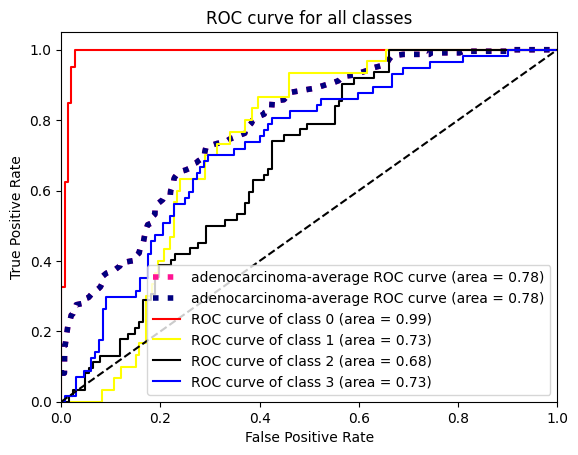

In [38]:
from itertools import cycle
lw = 1.5
roc_auc_scores = []
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["adenocarcinoma"] = all_fpr
tpr["adenocarcinoma"] = mean_tpr
roc_auc["adenocarcinoma"] = auc(fpr["adenocarcinoma"], tpr["adenocarcinoma"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["adenocarcinoma"], tpr["adenocarcinoma"],
         label='adenocarcinoma-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["adenocarcinoma"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["adenocarcinoma"], tpr["adenocarcinoma"],
         label='adenocarcinoma-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["adenocarcinoma"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['red', 'yellow', 'black' , 'blue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
    roc_auc_scores.append(roc_auc[i])
    

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for all classes')
plt.legend(loc='lower right')
plt.show()

## LSTM model 4

In [37]:
from keras import layers
import tensorflow
inputs = tensorflow.keras.layers.Input(shape=(110,110,1))
x = tf.keras.layers.Conv2D(32,(3,3) ,activation='relu',padding='same', input_shape=(224, 224, 1))(inputs)
x = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(x)
x = tf.keras.layers.Dropout(0.5)(x)
    
    
x = tf.keras.layers.Conv2D(64,(3,3),padding='same',activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(x)
x = tf.keras.layers.Dropout(0.5)(x)

x = tf.keras.layers.Conv2D(128,(3,3) ,padding='same', activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(x)
x = tf.keras.layers.Dropout(0.5)(x)

x = layers.Reshape((13*13, 128))(x)


x = layers.LSTM(32, activation='tanh')(x)


out = tf.keras.layers.Dense(4, activation='softmax')(x)
model_4 = tensorflow.keras.Model(inputs = inputs , outputs = out)

In [38]:
opt = tf.keras.optimizers.Adam(learning_rate = 0.0013)
model_4.compile(optimizer = opt , loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [39]:
model_4.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 110, 110, 1)]     0         
                                                                 
 conv2d_15 (Conv2D)          (None, 110, 110, 32)      320       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 55, 55, 32)       0         
 g2D)                                                            
                                                                 
 dropout_18 (Dropout)        (None, 55, 55, 32)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 55, 55, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 27, 27, 64)       0         
 g2D)                                                      

In [40]:
history_4 = model_4.fit(train_dataset, train_label,
                         epochs=50,
                         batch_size=16,
                         validation_data = (validation_dataset , validation_label))

Epoch 1/50
40/40 [==============================] - 6s 101ms/step - loss: 1.2893 - accuracy: 0.4095 - val_loss: 1.2072 - val_accuracy: 0.3827
Epoch 2/50
40/40 [==============================] - 5s 132ms/step - loss: 1.1029 - accuracy: 0.4889 - val_loss: 1.0182 - val_accuracy: 0.4321
Epoch 3/50
40/40 [==============================] - 6s 156ms/step - loss: 1.0243 - accuracy: 0.4968 - val_loss: 1.3530 - val_accuracy: 0.3580
Epoch 4/50
40/40 [==============================] - 6s 156ms/step - loss: 1.0081 - accuracy: 0.5286 - val_loss: 0.9525 - val_accuracy: 0.4938
Epoch 5/50
40/40 [==============================] - 6s 156ms/step - loss: 0.9665 - accuracy: 0.5429 - val_loss: 1.1366 - val_accuracy: 0.4444
Epoch 6/50
40/40 [==============================] - 7s 177ms/step - loss: 0.9588 - accuracy: 0.5349 - val_loss: 1.1214 - val_accuracy: 0.4198
Epoch 7/50
40/40 [==============================] - 7s 173ms/step - loss: 0.9270 - accuracy: 0.5397 - val_loss: 1.0837 - val_accuracy: 0.4321
Epoch 

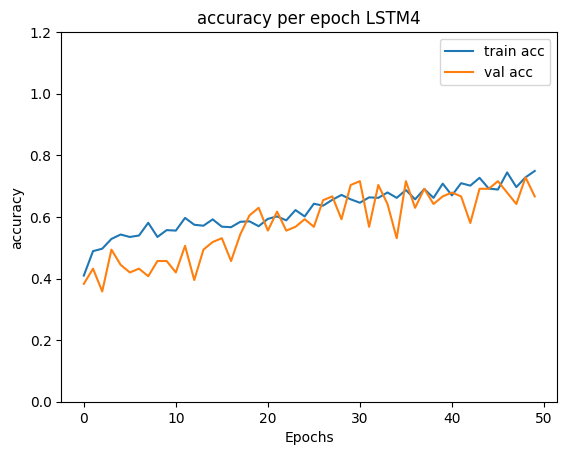

In [41]:
plt.plot(history_4.history['accuracy'], label='train acc')
plt.plot(history_4.history['val_accuracy'], label='val acc')
plt.ylim(0, 1.2)
plt.title('accuracy per epoch LSTM4')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
#plt.savefig('accuracy per epoch CNN-6' , dpi=100)
plt.show()


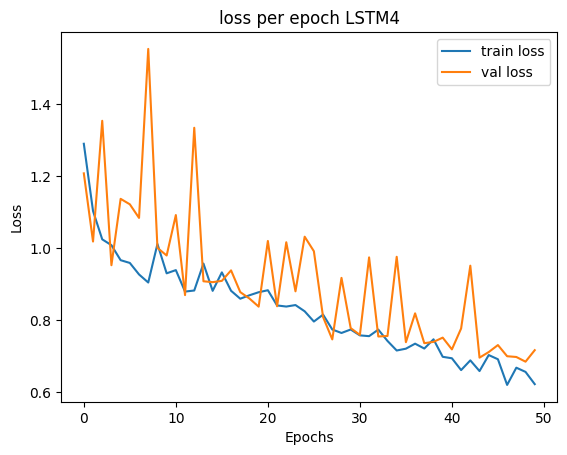

In [42]:
plt.plot(history_4.history['loss'], label='train loss')
plt.plot(history_4.history['val_loss'], label='val loss')
plt.title('loss per epoch LSTM4')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# plt.savefig('loss per epoch LSTM3' , dpi=100)
plt.show()

In [43]:
class_labels = ['adenocarcinoma','large.cell.carcinoma' ,'normal', 'squamous.cell.carcinoma']

In [44]:
ypred4 = model_4.predict(test_dataset , batch_size=16)
ypred_classes4 = np.argmax(ypred4, axis=1)
pred_label4 = np.argmax(model_4.predict(test_dataset, batch_size=16),axis=1)
true_label = np.argmax(test_label,axis=1)

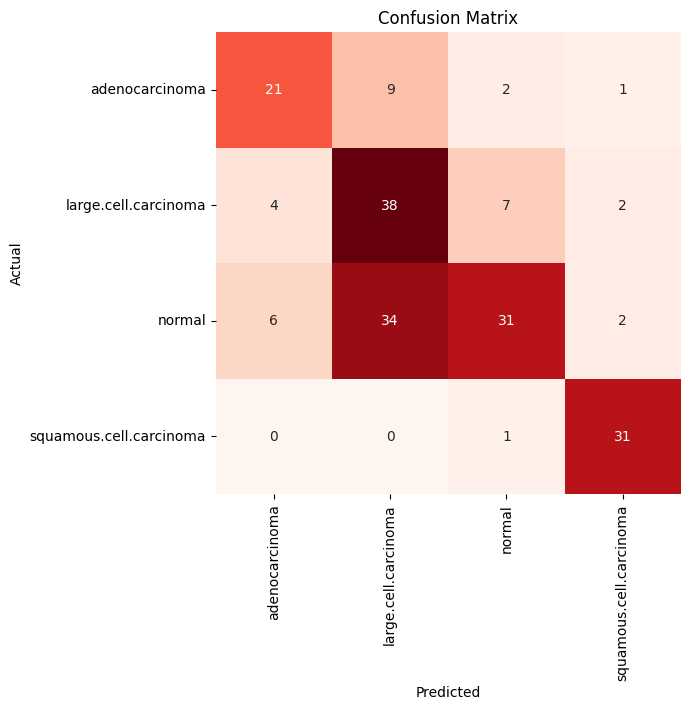

Classification Report:
----------------------
                          precision    recall  f1-score   support

         adenocarcinoma     0.6774    0.6364    0.6562        33
   large.cell.carcinoma     0.4691    0.7451    0.5758        51
                 normal     0.7561    0.4247    0.5439        73
squamous.cell.carcinoma     0.8611    0.9688    0.9118        32

               accuracy                         0.6402       189
              macro avg     0.6909    0.6937    0.6719       189
           weighted avg     0.6827    0.6402    0.6344       189



In [45]:
cm = confusion_matrix(true_label, pred_label4)
# plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap= 'Reds', cbar=False)       
plt.xticks(np.arange(4)+.5, class_labels, rotation=90)
plt.yticks(np.arange(4)+.5, class_labels, rotation=0)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
clr = classification_report(true_label, pred_label4, target_names=class_labels, digits= 4) # create classification report
print("Classification Report:\n----------------------\n", clr)

In [46]:
n_classes = 4 

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(test_label[:, i], ypred4[:, i], )
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["adenocarcinoma"], tpr["adenocarcinoma"], _ = roc_curve(test_label.ravel(), ypred4.ravel())
roc_auc["adenocarcinoma"] = auc(fpr["adenocarcinoma"], tpr["adenocarcinoma"])

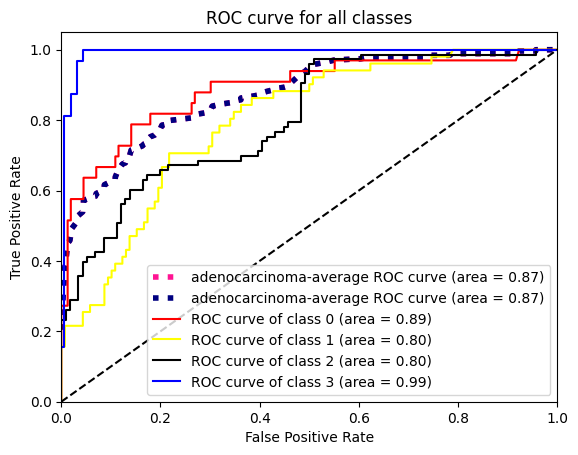

In [47]:
from itertools import cycle
lw = 1.5
roc_auc_scores = []
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["adenocarcinoma"] = all_fpr
tpr["adenocarcinoma"] = mean_tpr
roc_auc["adenocarcinoma"] = auc(fpr["adenocarcinoma"], tpr["adenocarcinoma"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["adenocarcinoma"], tpr["adenocarcinoma"],
         label='adenocarcinoma-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["adenocarcinoma"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["adenocarcinoma"], tpr["adenocarcinoma"],
         label='adenocarcinoma-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["adenocarcinoma"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['red', 'yellow', 'black' , 'blue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
    roc_auc_scores.append(roc_auc[i])
    

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for all classes')
plt.legend(loc='lower right')
plt.show()